# Задание 8
Постройте три модели для прогнозирования цены квартир:

1.на основе количества метров;
2.на основе расстояния до метро;
3.на основе квадратных метров & расстояния до метро;

Далее:
Сравните исходные и прогнозные значения с помощью метрик качества
(всех упомянутых в презентации метрик для всех моделей).


Исходные данные для задания 8 – flat.csv


In [49]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

matplotlib.style.use('ggplot')
%matplotlib inline

In [50]:
df = pd.read_csv('FLATS.csv', sep=";", header = 0, index_col=False)
del df['Unnamed: 4']
df.head()

,Id,SQUARE_METERS,METRO_DISTANCE,PRICE
0,601,28,677,7328400
1,602,54,120,9754600
2,603,43,1344,6781500
3,604,33,1003,6784100
4,605,30,591,7296200


In [51]:
df.shape

(100, 4)

In [52]:
df.dtypes

Id                int64
SQUARE_METERS     int64
METRO_DISTANCE    int64
PRICE             int64
dtype: object

Модель для прогнозирования цены квартир на основе количества метров

In [53]:
X = df[['SQUARE_METERS']]
y = df['PRICE']

In [54]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [55]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)
y_pred_train = model.predict(X_train)

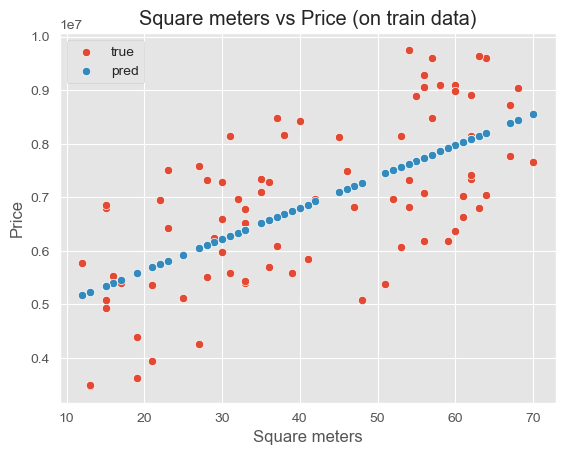

In [56]:
sns.scatterplot(x=X_train['SQUARE_METERS'], y=y_train, label='true')
sns.scatterplot(x=X_train['SQUARE_METERS'], y=y_pred_train, label='pred')
plt.legend()
plt.xlabel('Square meters')
plt.ylabel('Price')
plt.title('Square meters vs Price (on train data)')
plt.show()

In [57]:
def mean_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(((y_true - y_pred) / y_true)) * 100

def absolute_deviation(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return (np.abs(y_true - y_pred)).sum()

def mean_absolute_deviation(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs(y_true - y_pred))

def tail_mismatch_coefficient(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.sqrt((np.square(y_true - y_pred)).sum() / ((np.square(y_true)).sum() + (np.square(y_pred)).sum()))

In [58]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score

print(f"MAE (средняя абсолютная ошибка прогноза) = {round(mean_absolute_error(y_train, y_pred_train), 3)}")
print(f"RMSE (среднеквадратическое отклонение) = {round(mean_squared_error(y_train, y_pred_train, squared=False), 3)}")
print(f"MSE (среднеквадратическое отклонение) = {round(mean_squared_error(y_train, y_pred_train, squared=True), 3)}")
print(f"MPE (средний процент ошибки) = {round(mean_percentage_error(y_train, y_pred_train), 3)}")
print(f"MAPE (средняя относительная ошибка) = {round(mean_absolute_percentage_error(y_train, y_pred_train), 3)}")
print(f"AD (абсолютное отклонение от среднего) = {round(absolute_deviation(y_train, y_pred_train), 3)}")
print(f"MAD (среднее абсолютное отклонение) = {round(mean_absolute_deviation(y_train, y_pred_train), 3)}")
print (f'R^2: {round(r2_score(y_train, y_pred_train), 3)}')
print(f"Коэффициент несоответствия Тейла = {round(tail_mismatch_coefficient(y_train, y_pred_train), 3)}")

MAE (средняя абсолютная ошибка прогноза) = 1007614.955
RMSE (среднеквадратическое отклонение) = 1155276.86
MSE (среднеквадратическое отклонение) = 1334664622537.446
MPE (средний процент ошибки) = -3.313
MAPE (средняя относительная ошибка) = 0.158
AD (абсолютное отклонение от среднего) = 80609196.39
MAD (среднее абсолютное отклонение) = 1007614.955
R^2: 0.426
Коэффициент несоответствия Тейла = 0.116


In [59]:
y_pred_test = model.predict(X_test)

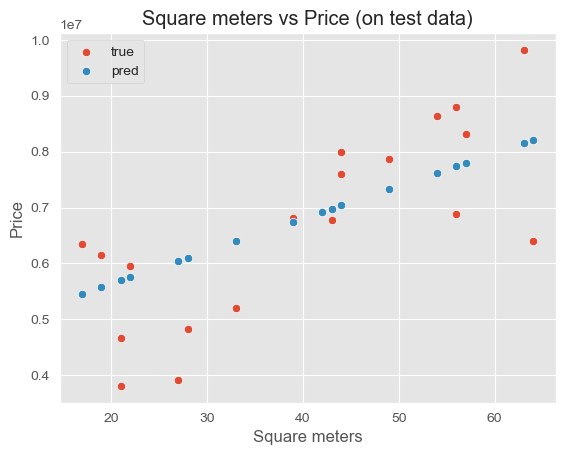

In [60]:
sns.scatterplot(x=X_test['SQUARE_METERS'], y=y_test, label='true')
sns.scatterplot(x=X_test['SQUARE_METERS'], y=y_pred_test, label='pred')
plt.legend()
plt.xlabel('Square meters')
plt.ylabel('Price')
plt.title('Square meters vs Price (on test data)')
plt.show()

In [61]:
print(f"MAE (средняя абсолютная ошибка прогноза) = {round(mean_absolute_error(y_test, y_pred_test), 3)}")
print(f"RMSE (среднеквадратическое отклонение) = {round(mean_squared_error(y_test, y_pred_test, squared=False), 3)}")
print(f"MSE (среднеквадратическое отклонение) = {round(mean_squared_error(y_test, y_pred_test, squared=True), 3)}")
print(f"MPE (средний процент ошибки) = {round(mean_percentage_error(y_test, y_pred_test), 3)}")
print(f"MAPE (средняя относительная ошибка) = {round(mean_absolute_percentage_error(y_test, y_pred_test), 3)}")
print(f"AD (абсолютное отклонение от среднего) = {round(absolute_deviation(y_test, y_pred_test), 3)}")
print(f"MAD (среднее абсолютное отклонение) = {round(mean_absolute_deviation(y_test, y_pred_test), 3)}")
print (f'R^2: {round(r2_score(y_test, y_pred_test), 3)}')
print(f"Коэффициент несоответствия Тейла = {round(tail_mismatch_coefficient(y_test, y_pred_test), 3)}")

MAE (средняя абсолютная ошибка прогноза) = 921019.703
RMSE (среднеквадратическое отклонение) = 1097435.509
MSE (среднеквадратическое отклонение) = 1204364697486.31
MPE (средний процент ошибки) = -5.902
MAPE (средняя относительная ошибка) = 0.16
AD (абсолютное отклонение от среднего) = 18420394.063
MAD (среднее абсолютное отклонение) = 921019.703
R^2: 0.531
Коэффициент несоответствия Тейла = 0.113


Модель для прогнозирования цены квартир на основе расстояния до метро

In [62]:
X = df[['METRO_DISTANCE']]
y = df['PRICE']

In [63]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [64]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)
y_pred_train = model.predict(X_train)

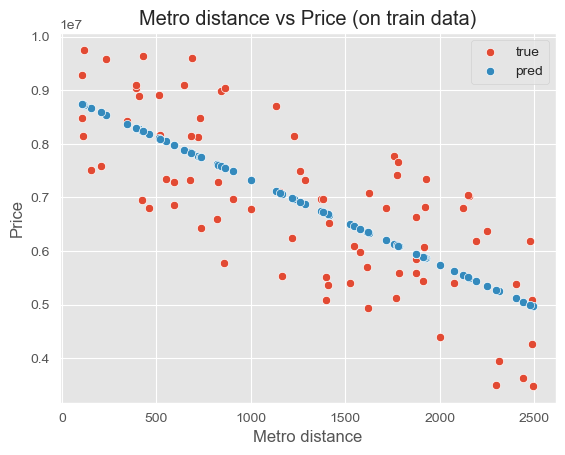

In [65]:
sns.scatterplot(x=X_train['METRO_DISTANCE'], y=y_train, label='true')
sns.scatterplot(x=X_train['METRO_DISTANCE'], y=y_pred_train, label='pred')
plt.legend()
plt.xlabel('Metro distance')
plt.ylabel('Price')
plt.title('Metro distance vs Price (on train data)')
plt.show()

In [66]:
print(f"MAE (средняя абсолютная ошибка прогноза) = {round(mean_absolute_error(y_train, y_pred_train), 3)}")
print(f"RMSE (среднеквадратическое отклонение) = {round(mean_squared_error(y_train, y_pred_train, squared=False), 3)}")
print(f"MSE (среднеквадратическое отклонение) = {round(mean_squared_error(y_train, y_pred_train, squared=True), 3)}")
print(f"MPE (средний процент ошибки) = {round(mean_percentage_error(y_train, y_pred_train), 3)}")
print(f"MAPE (средняя относительная ошибка) = {round(mean_absolute_percentage_error(y_train, y_pred_train), 3)}")
print(f"AD (абсолютное отклонение от среднего) = {round(absolute_deviation(y_train, y_pred_train), 3)}")
print(f"MAD (среднее абсолютное отклонение) = {round(mean_absolute_deviation(y_train, y_pred_train), 3)}")
print (f'R^2: {round(r2_score(y_train, y_pred_train), 3)}')
print(f"Коэффициент несоответствия Тейла = {round(tail_mismatch_coefficient(y_train, y_pred_train), 3)}")

MAE (средняя абсолютная ошибка прогноза) = 887906.18
RMSE (среднеквадратическое отклонение) = 1018370.351
MSE (среднеквадратическое отклонение) = 1037078172533.485
MPE (средний процент ошибки) = -2.64
MAPE (средняя относительная ошибка) = 0.14
AD (абсолютное отклонение от среднего) = 71032494.422
MAD (среднее абсолютное отклонение) = 887906.18
R^2: 0.554
Коэффициент несоответствия Тейла = 0.103


In [67]:
y_pred_test = model.predict(X_test)

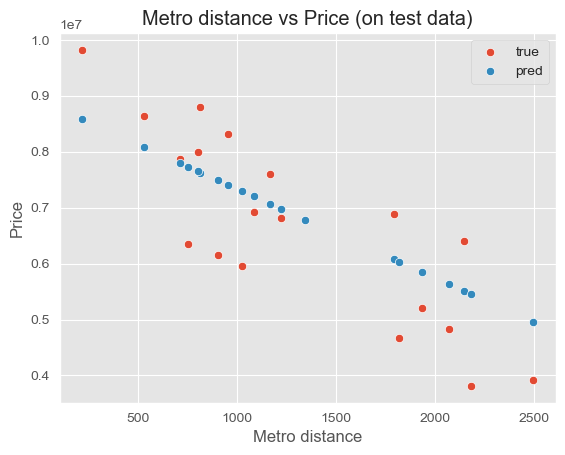

In [68]:
sns.scatterplot(x=X_test['METRO_DISTANCE'], y=y_test, label='true')
sns.scatterplot(x=X_test['METRO_DISTANCE'], y=y_pred_test, label='pred')
plt.legend()
plt.xlabel('Metro distance')
plt.ylabel('Price')
plt.title('Metro distance vs Price (on test data)')
plt.show()

In [69]:
print(f"MAE (средняя абсолютная ошибка прогноза) = {round(mean_absolute_error(y_test, y_pred_test), 3)}")
print(f"RMSE (среднеквадратическое отклонение) = {round(mean_squared_error(y_test, y_pred_test, squared=False), 3)}")
print(f"MSE (среднеквадратическое отклонение) = {round(mean_squared_error(y_test, y_pred_test, squared=True), 3)}")
print(f"MPE (средний процент ошибки) = {round(mean_percentage_error(y_test, y_pred_test), 3)}")
print(f"MAPE (средняя относительная ошибка) = {round(mean_absolute_percentage_error(y_test, y_pred_test), 3)}")
print(f"AD (абсолютное отклонение от среднего) = {round(absolute_deviation(y_test, y_pred_test), 3)}")
print(f"MAD (среднее абсолютное отклонение) = {round(mean_absolute_deviation(y_test, y_pred_test), 3)}")
print (f'R^2: {round(r2_score(y_test, y_pred_test), 3)}')
print(f"Коэффициент несоответствия Тейла = {round(tail_mismatch_coefficient(y_test, y_pred_test), 3)}")

MAE (средняя абсолютная ошибка прогноза) = 825845.356
RMSE (среднеквадратическое отклонение) = 952558.35
MSE (среднеквадратическое отклонение) = 907367409482.992
MPE (средний процент ошибки) = -5.955
MAPE (средняя относительная ошибка) = 0.141
AD (абсолютное отклонение от среднего) = 16516907.116
MAD (среднее абсолютное отклонение) = 825845.356
R^2: 0.647
Коэффициент несоответствия Тейла = 0.098


Модель для прогнозирования цены квартир на основе квадратных метров & расстояния до метро

In [70]:
X = df[['METRO_DISTANCE', 'SQUARE_METERS']]
y = df['PRICE']

In [71]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [72]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)
y_pred_train = model.predict(X_train)

In [73]:
print(f"MAE (средняя абсолютная ошибка прогноза) = {round(mean_absolute_error(y_train, y_pred_train), 3)}")
print(f"RMSE (среднеквадратическое отклонение) = {round(mean_squared_error(y_train, y_pred_train, squared=False), 3)}")
print(f"MSE (среднеквадратическое отклонение) = {round(mean_squared_error(y_train, y_pred_train, squared=True), 3)}")
print(f"MPE (средний процент ошибки) = {round(mean_percentage_error(y_train, y_pred_train), 3)}")
print(f"MAPE (средняя относительная ошибка) = {round(mean_absolute_percentage_error(y_train, y_pred_train), 3)}")
print(f"AD (абсолютное отклонение от среднего) = {round(absolute_deviation(y_train, y_pred_train), 3)}")
print(f"MAD (среднее абсолютное отклонение) = {round(mean_absolute_deviation(y_train, y_pred_train), 3)}")
print (f'R^2: {round(r2_score(y_train, y_pred_train), 3)}')
print(f"Коэффициент несоответствия Тейла = {round(tail_mismatch_coefficient(y_train, y_pred_train), 3)}")

MAE (средняя абсолютная ошибка прогноза) = 194061.208
RMSE (среднеквадратическое отклонение) = 232501.071
MSE (среднеквадратическое отклонение) = 54056747853.039
MPE (средний процент ошибки) = -0.12
MAPE (средняя относительная ошибка) = 0.029
AD (абсолютное отклонение от среднего) = 15524896.616
MAD (среднее абсолютное отклонение) = 194061.208
R^2: 0.977
Коэффициент несоответствия Тейла = 0.023


In [74]:
y_pred_test = model.predict(X_test)

In [75]:
print(f"MAE (средняя абсолютная ошибка прогноза) = {round(mean_absolute_error(y_test, y_pred_test), 3)}")
print(f"RMSE (среднеквадратическое отклонение) = {round(mean_squared_error(y_test, y_pred_test, squared=False), 3)}")
print(f"MSE (среднеквадратическое отклонение) = {round(mean_squared_error(y_test, y_pred_test, squared=True), 3)}")
print(f"MPE (средний процент ошибки) = {round(mean_percentage_error(y_test, y_pred_test), 3)}")
print(f"MAPE (средняя относительная ошибка) = {round(mean_absolute_percentage_error(y_test, y_pred_test), 3)}")
print(f"AD (абсолютное отклонение от среднего) = {round(absolute_deviation(y_test, y_pred_test), 3)}")
print(f"MAD (среднее абсолютное отклонение) = {round(mean_absolute_deviation(y_test, y_pred_test), 3)}")
print (f'R^2: {round(r2_score(y_test, y_pred_test), 3)}')
print(f"Коэффициент несоответствия Тейла = {round(tail_mismatch_coefficient(y_test, y_pred_test), 3)}")

MAE (средняя абсолютная ошибка прогноза) = 183344.753
RMSE (среднеквадратическое отклонение) = 234572.804
MSE (среднеквадратическое отклонение) = 55024400538.784
MPE (средний процент ошибки) = -1.805
MAPE (средняя относительная ошибка) = 0.03
AD (абсолютное отклонение от среднего) = 3666895.065
MAD (среднее абсолютное отклонение) = 183344.753
R^2: 0.979
Коэффициент несоответствия Тейла = 0.024
